In [2]:
import pandas as pd
import seaborn as sns
stuPer = pd.read_csv("StudentsPerformance.csv")
stuPer.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


<b>Grouping by test preparation course</b>

In [8]:
stuPer.groupby("test preparation course").mean()

,math score,reading score,writing score
test preparation course,,,
completed,69.695531,73.893855,74.418994
none,64.077882,66.534268,64.504673


<AxesSubplot:xlabel='test preparation course', ylabel='math score'>

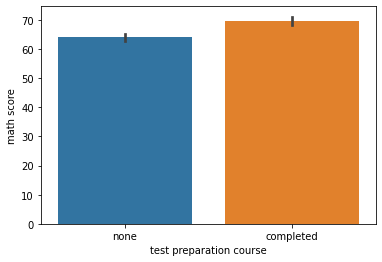

In [10]:
sns.barplot(y="math score", x="test preparation course", data=stuPer)

There is a small difference between the math results from students that completed their test preparation course and those that did not. The students that completed the course got a significantly slightly better score.

<AxesSubplot:xlabel='test preparation course', ylabel='reading score'>

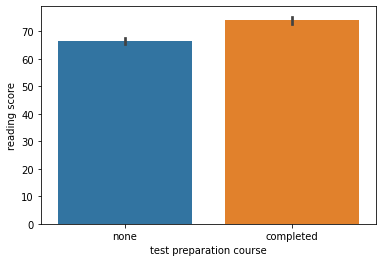

In [17]:
sns.barplot(y="reading score", x="test preparation course", data=stuPer)

We can see more clearly in this barplot that students who completed the preparation got significantly better scores at the reading test, because those confidence intervals do not overlap, we know it is a true difference.

<AxesSubplot:xlabel='test preparation course', ylabel='writing score'>

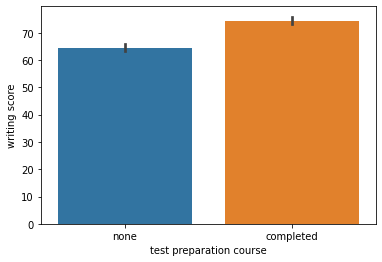

In [18]:
sns.barplot(y="writing score", x="test preparation course", data=stuPer)

The writing test was made significantly better by students that completed the test preparation course, the confidence intervals do not overlap so we know it is significant.

A minor inconvenience with this dataset is that the results on the different tests are almost the same if we compare them with the categorical data, so for easier comparison we can also add a calculated column which exists of the 3 test results.

In [25]:
stuPer['average test score'] = (stuPer["math score"] + stuPer["reading score"] + stuPer["writing score"])/3

In [26]:
stuPer.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average test score
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333


We can now look at the effects of the test preparation courses more easily by using the average column.

<AxesSubplot:xlabel='test preparation course', ylabel='average test score'>

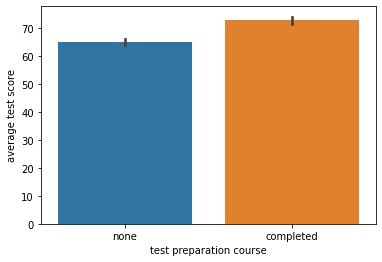

In [27]:
sns.barplot(y="average test score", x="test preparation course", data=stuPer)

There is a difference between the test scores from students that completed the test preparation course and those that didn't. Because the confidence intervals do not overlap this difference is significant. Students that took the test preparation course scored higher on the tests.

<b>Grouping by genders</b>
Lets now take a look if there is a difference between the genders in the test scores.

In [29]:
stuPer.groupby("gender").mean()

,math score,reading score,writing score,average test score
gender,,,,
female,63.633205,72.608108,72.467181,69.569498
male,68.728216,65.473029,63.311203,65.837483


There is a difference between male and female students if we only look at the means from the test scores, but lets see if those differences are significant.

<AxesSubplot:xlabel='gender', ylabel='math score'>

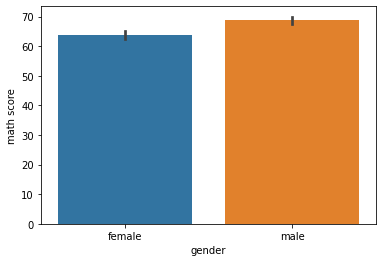

In [30]:
sns.barplot(y="math score", x="gender", data=stuPer)

Male students scored slightly better at the math tests, this is a significant difference because the confidence intervals do not overlap, it is however not a very large difference.

<AxesSubplot:xlabel='gender', ylabel='reading score'>

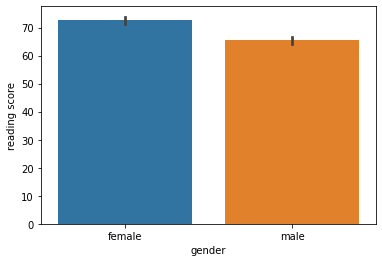

In [31]:
sns.barplot(y="reading score", x="gender", data=stuPer)

Female students made the reading test significantly better than the male students did, the confidence intervals do not overlap so we know this is a real difference.

<AxesSubplot:xlabel='gender', ylabel='writing score'>

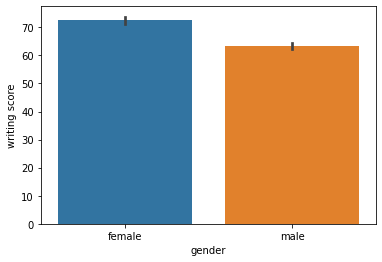

In [33]:
sns.barplot(y="writing score", x="gender", data=stuPer)

The female students made the writing test significantly better too, we can now say that the female students from this sample data made the writing and reading tests better than their male colleagues.

<AxesSubplot:xlabel='gender', ylabel='average test score'>

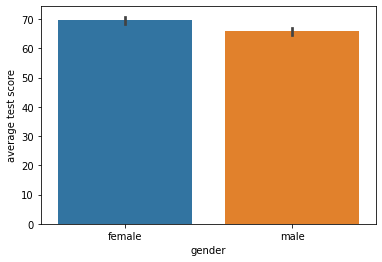

In [45]:
sns.barplot(y="average test score", x="gender", data=stuPer)

Now we know that the female students scored higher on average on these tests, we can not say things like, females are better students or females are smarter, the only thing we know right now is that at this particular school the female students scored higher on average on the tests they made. But maybe all female students took the test preparation course, and no male student did that because e.g. of a football tournament on the exact same day or a big soccer tournament on tv. We only know what the results tell us and it is very hard to find a cause for the effects we can say were significant.

<b>Group by parental level of education</b>

In [89]:
stuPer.groupby("parental level of education").mean()

,math score,reading score,writing score,average test score
parental level of education,,,,
associate's degree,67.882883,70.927928,69.896396,69.569069
bachelor's degree,69.389831,73.000000,73.381356,71.923729
high school,62.137755,64.704082,62.448980,63.096939
master's degree,69.745763,75.372881,75.677966,73.598870
some college,67.128319,69.460177,68.840708,68.476401
some high school,63.497207,66.938547,64.888268,65.108007


There are differences between the scores e.g. masters degree and high school education, let us look if those variations are significant.

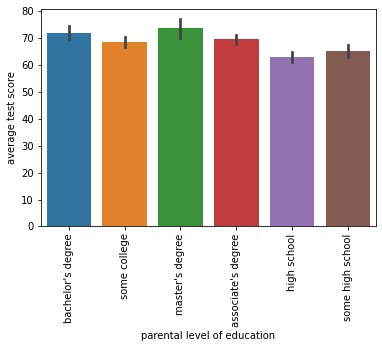

In [85]:
barplot = sns.barplot(y="average test score", x="parental level of education", data=stuPer)
for item in barplot.get_xticklabels():
    item.set_rotation(90)

We can see some variations between the levels of education of some parents and the average test score of their children, but we can't really say there is a significant difference, most confidence intervals overlap at least slightly with others. Although we can say that there is a small significant difference between students with parents that got a master's degree and those that have a parental level of education of high school. The master's degree students scored slightly higher on the tests, but the confidence interval is quite large. We need more data to draw a conclusion.

<b>Group by race/ethnicity</b>

In [90]:
stuPer.groupby("race/ethnicity").mean()

,math score,reading score,writing score,average test score
race/ethnicity,,,,
group A,61.629213,64.674157,62.674157,62.992509
group B,63.452632,67.352632,65.600000,65.468421
group C,64.463950,69.103448,67.827586,67.131661
group D,67.362595,70.030534,70.145038,69.179389
group E,73.821429,73.028571,71.407143,72.752381


There are some differences between f.e. Group A and E but are those significant?

<AxesSubplot:xlabel='race/ethnicity', ylabel='average test score'>

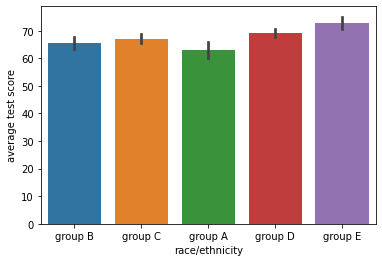

In [50]:
sns.barplot(y="average test score", x="race/ethnicity", data=stuPer)

It is quite hard to give a conclusion about students and the influence of ethnicity on their scores, because the scores are influenced by so many variables, that it is a bit unfair to say group A or E scores better on scores. But based on just the data we received, we can say there is a significant difference between the students from group E and group A. Students from Group E scored significantly higher on the tests they made.

<b>Group by type of lunch</b>

In [91]:
stuPer.groupby("lunch").mean()

,math score,reading score,writing score,average test score
lunch,,,,
free/reduced,58.921127,64.653521,63.022535,62.199061
standard,70.034109,71.654264,70.823256,70.837209


A major difference exists between student scores from students with a complete lunch and those with a reduced or free lunch, but is it a significant difference?

<AxesSubplot:xlabel='lunch', ylabel='average test score'>

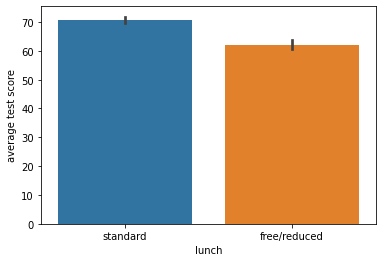

In [53]:
sns.barplot(y="average test score", x="lunch", data=stuPer)

There is a significant difference in test scores between the students that ate a standard lunch and a free or reduced lunch. The students who ate a free or reduced lunch scored lower on the tests than the students which ate a standard lunch. We can't say that eating a standard lunch makes you score better on your test, but it is an interesting discrepancy that might be worth further investigated by others.

We have to further investigate the found correlations or significant differences by comparing the categorical data with the other categorical data, e.g. we have to look if the female students all did the complete test preparation course and if the male students didn't because that could explain such a difference. We'll be doing that in further analysis.